
# Project 1

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply **all** the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear), Decison Tree Regressor. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy beside accuracy and justify your choice.
- Apply **all** the classification models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results.
- Your submission should have at least the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. 
- Finally, find the best model for the classification dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Deliverables:
- Use markdown to provide inline comments for this project. 
- Use markdown to create a report for this project. 
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs. 
- Visualization highly encouraged. 
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convention:
    - ``Project1_Regression_GroupXX_Lastname1_Lastname2.ipynb``
    - ``Project1_Classification_GroupXX_Lastname1_Lastname2.ipynb``
  
  then zip these two files and the csv files of the two datasets into one file and submit. 
- If you are submitting a single file, then please follow below naming convention:
    - ``Project1_Both_GroupXX_Lastname1_Lastname2.ipynb
    then zip these this file and the csv files of the two datasets into one file and submit. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. 

In [462]:
import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
import matplotlib.gridspec as gridspec
import itertools
from sklearn.tree import DecisionTreeClassifier
import os 
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from mlxtend.plotting import plot_decision_regions

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

ModuleNotFoundError: No module named 'mlxtend'

## Classification

#### Link to the airline passenger satisfaction dataset: 
https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction

## Project Description 

In [174]:
# Read data 
# classdf = pd.read_csv("classification_dataset.csv")

In [9]:
# # Shuffle and drop data 
# classdf = classdf.sample(frac=1)

In [10]:
# # Keep 1000 records
# classdf = classdf[:1000]

In [11]:
# # Split data into independent and dependent variables for missing data
# X = classdf.drop(['satisfaction', 'id'], axis=1)

In [12]:
# y = classdf[['satisfaction', 'id']]

In [13]:
# #Create missing values

# for col in X.columns:
#     X.loc[X.sample(frac=0.003).index, col] = np.nan

In [14]:
# df1 = pd.concat([X, y], axis=1)

In [15]:
# df1.isna().sum().sum() / len(df1)

0.072

In [16]:
# df1.to_csv('classification.csv')

### Read Data
Import data from .csv to Dataframe using Pandas

In [148]:
df = pd.read_csv("classification.csv")

### Explore and Transform Data
- EDA through histograms, bar charts, and correlation plots
- Check for missing data
- Scale data

#### Explore Dataset

Print out first and last rows of observation:

In [18]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,id
0,50578,50578.0,Female,Loyal Customer,26.0,Personal Travel,Eco Plus,617.0,1.0,5.0,...,5.0,2.0,5.0,4.0,4.0,2.0,12.0,20.0,neutral or dissatisfied,13813
1,29342,29342.0,Female,disloyal Customer,36.0,Business travel,Eco,308.0,2.0,2.0,...,4.0,5.0,4.0,2.0,3.0,3.0,51.0,44.0,neutral or dissatisfied,115549
2,21772,21772.0,Male,Loyal Customer,28.0,Business travel,Eco Plus,209.0,4.0,1.0,...,3.0,NaN,3.0,1.0,3.0,4.0,0.0,0.0,satisfied,34828
3,96426,96426.0,Male,disloyal Customer,24.0,Business travel,Business,356.0,5.0,4.0,...,5.0,4.0,4.0,4.0,5.0,1.0,0.0,0.0,satisfied,79041
4,80523,80523.0,Male,Loyal Customer,26.0,Business travel,Eco,515.0,4.0,1.0,...,1.0,3.0,4.0,4.0,4.0,4.0,22.0,24.0,satisfied,26127


In [19]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,id
995,16783,16783.0,Male,Loyal Customer,35.0,Personal Travel,Eco,110.0,0.0,5.0,...,2.0,3.0,3.0,2.0,2.0,3.0,77.0,74.0,satisfied,50493
996,5203,5203.0,Male,Loyal Customer,60.0,Business travel,Business,1542.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,2.0,0.0,0.0,satisfied,29699
997,86152,86152.0,Male,Loyal Customer,66.0,Personal Travel,Eco,545.0,4.0,2.0,...,2.0,4.0,1.0,1.0,2.0,2.0,0.0,1.0,neutral or dissatisfied,88711
998,43992,43992.0,Female,Loyal Customer,51.0,Business travel,Business,2506.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,3.0,55.0,56.0,satisfied,109857
999,19649,19649.0,Male,disloyal Customer,26.0,Business travel,Eco,533.0,1.0,3.0,...,4.0,4.0,4.0,3.0,4.0,4.0,55.0,56.0,neutral or dissatisfied,31272


Get info about the dataset variables and observations

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         1000 non-null   int64  
 1   Unnamed: 0.1                       997 non-null    float64
 2   Gender                             997 non-null    object 
 3   Customer Type                      997 non-null    object 
 4   Age                                997 non-null    float64
 5   Type of Travel                     997 non-null    object 
 6   Class                              997 non-null    object 
 7   Flight Distance                    997 non-null    float64
 8   Inflight wifi service              997 non-null    float64
 9   Departure/Arrival time convenient  997 non-null    float64
 10  Ease of Online booking             997 non-null    float64
 11  Gate location                      997 non-null    float6

The dataset consists of 1 identification column (id), 19 categorical variables (Gender, Customer Type, Type of travel, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, satisfaction), and 4 continuous variables (Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes).

The target variable in this dataset is satisfaction. The goal of this project is to create models that will help to predict whether a customer will be satisfied or dissatisfied about their flight with the airline.

Here we get basic descriptive statistics about continuous variables:

In [21]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
count,1000.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.00000,997.000000,997.000000,997.000000,997.000000,994.000000,1000.000000
mean,52057.521000,52055.742227,39.754263,1270.513541,2.785356,3.108325,2.792377,2.957874,3.182548,3.291876,...,3.395186,3.415246,3.421264,3.69007,3.289870,3.672016,3.295888,16.254764,16.153924,66107.302000
std,30421.257445,30437.168016,14.847985,1046.302927,1.335365,1.530907,1.429052,1.294191,1.310590,1.384098,...,1.323368,1.305721,1.292964,1.15784,1.303081,1.168422,1.296316,39.482614,40.064418,37593.030132
min,37.000000,37.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,76.000000
25%,26161.750000,26166.000000,27.000000,442.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,0.000000,0.000000,31894.250000
50%,51379.500000,51379.000000,40.000000,903.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,4.00000,3.000000,4.000000,3.000000,0.000000,0.000000,68546.500000
75%,80255.000000,80516.000000,52.000000,1921.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,5.00000,4.000000,5.000000,4.000000,16.000000,14.000000,97185.750000
max,103821.000000,103821.000000,76.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,407.000000,409.000000,129717.000000


Before we begin graphing or doing transformations on the data, we will drop unnecessary columns that do not provide any information that could help with classifying the data, such as the id and unnamed columns

In [149]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis=1)

We see that id and the unnamed columns are no longer a part of the dataframe

In [23]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

##### Graphs and Plots
Below you can see different counts of categorical variables showing the distribution of the data

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '4.0'),
  Text(1, 0, '5.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '1.0'),
  Text(5, 0, '0.0')])

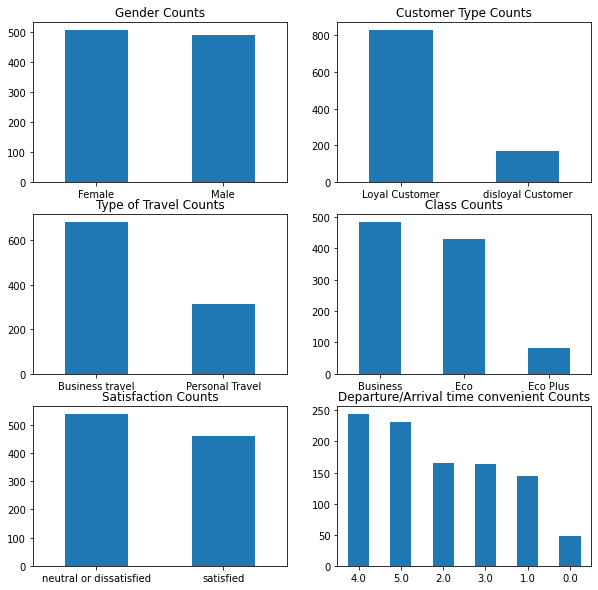

In [24]:
# Set up a grid of plots for categorical data and numerical data
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot Gender counts
plt.subplot2grid(fig_dims, (0, 0))
df['Gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')
plt.xticks(rotation=0)

# Plot Customer Type counts
plt.subplot2grid(fig_dims, (0, 1))
df['Customer Type'].value_counts().plot(kind='bar', 
                                       title='Customer Type Counts')
plt.xticks(rotation=0)

# Plot Type of Travel counts
plt.subplot2grid(fig_dims, (1, 0))
df['Type of Travel'].value_counts().plot(kind='bar', 
                                    title='Type of Travel Counts')
plt.xticks(rotation=0)

# Plot Class counts
plt.subplot2grid(fig_dims, (1, 1))
df['Class'].value_counts().plot(kind='bar', 
                                         title='Class Counts')
plt.xticks(rotation=0)

# Plot Satisfaction counts
plt.subplot2grid(fig_dims, (2, 0))
df['satisfaction'].value_counts().plot(kind='bar', 
                                         title='Satisfaction Counts')
plt.xticks(rotation=0)

# Plot Satisfaction counts
plt.subplot2grid(fig_dims, (2, 1))
df['Departure/Arrival time convenient'].value_counts().plot(kind='bar', 
                                         title='Departure/Arrival time convenient Counts')
plt.xticks(rotation=0)


<AxesSubplot:title={'center':'Gate location'}>

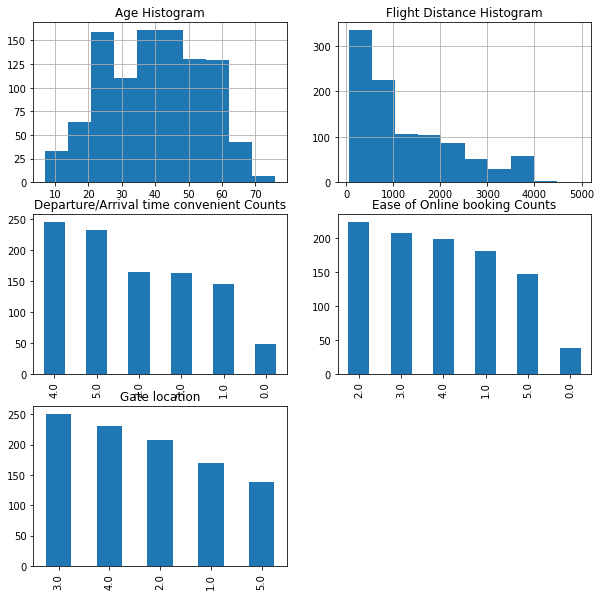

In [25]:
# Set up a grid of plots for categorical data and numerical data
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 0))
df['Age'].hist()
plt.title('Age Histogram')

# Plot the Flight Distance histogram
plt.subplot2grid(fig_dims, (0, 1))
df['Flight Distance'].hist()
plt.title('Flight Distance Histogram')

# Plot the wifi service histogram
plt.subplot2grid(fig_dims, (1, 0))
df['Inflight wifi service'].value_counts().plot(kind='bar', 
                                         title='Inflight wifi service Counts')

# Plot the Departure/Arrival time convenient histogram
plt.subplot2grid(fig_dims, (1, 0))
df['Departure/Arrival time convenient'].value_counts().plot(kind='bar', 
                                         title='Departure/Arrival time convenient Counts')

# Plot the Ease of Online booking histogram
plt.subplot2grid(fig_dims, (1, 1))
df['Ease of Online booking'].value_counts().plot(kind='bar', 
                                         title='Ease of Online booking Counts')

# Plot the Gate location histogram
plt.subplot2grid(fig_dims, (2, 0))
df['Gate location'].value_counts().plot(kind='bar', 
                                         title='Gate location')


##### Correlation plot of all variables

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Flight Distance'),
  Text(2.5, 0, 'Inflight wifi service'),
  Text(3.5, 0, 'Departure/Arrival time convenient'),
  Text(4.5, 0, 'Ease of Online booking'),
  Text(5.5, 0, 'Gate location'),
  Text(6.5, 0, 'Food and drink'),
  Text(7.5, 0, 'Online boarding'),
  Text(8.5, 0, 'Seat comfort'),
  Text(9.5, 0, 'Inflight entertainment'),
  Text(10.5, 0, 'On-board service'),
  Text(11.5, 0, 'Leg room service'),
  Text(12.5, 0, 'Baggage handling'),
  Text(13.5, 0, 'Checkin service'),
  Text(14.5, 0, 'Inflight service'),
  Text(15.5, 0, 'Cleanliness'),
  Text(16.5, 0, 'Departure Delay in Minutes'),
  Text(17.5, 0, 'Arrival Delay in Minutes')])

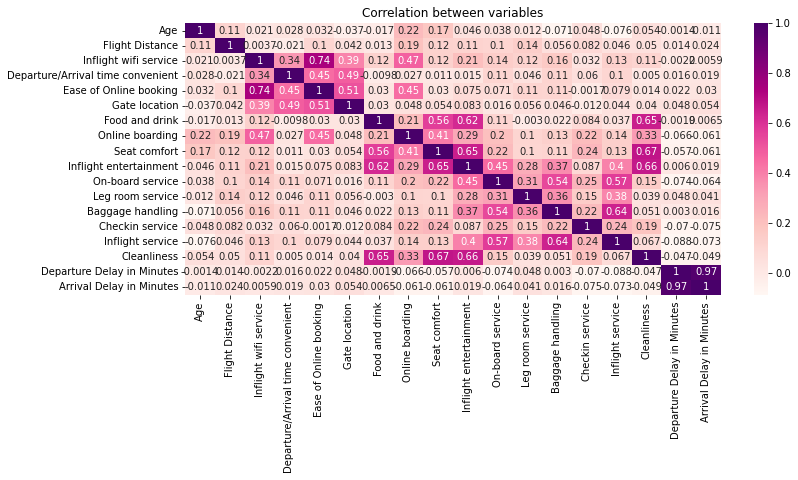

In [26]:
plt.subplots(figsize=(12,5))
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation between variables')
plt.xticks(rotation=90)

According to the above correlation plots, there does not seem to be any major correlation between variables that would cause any issues except for the departure and arrival delays.

#### Missing Data & Transformations

In [27]:
# Get missing data for each column
df.isna().sum()

Gender                               3
Customer Type                        3
Age                                  3
Type of Travel                       3
Class                                3
Flight Distance                      3
Inflight wifi service                3
Departure/Arrival time convenient    3
Ease of Online booking               3
Gate location                        3
Food and drink                       3
Online boarding                      3
Seat comfort                         3
Inflight entertainment               3
On-board service                     3
Leg room service                     3
Baggage handling                     3
Checkin service                      3
Inflight service                     3
Cleanliness                          3
Departure Delay in Minutes           3
Arrival Delay in Minutes             6
satisfaction                         0
dtype: int64

In [150]:
# Get percentage of missing values for the dataset
print('Missing data: {:.2f}%'.format((df.isna().sum().sum() / len(df)) * 100))

Missing data: 6.90%


In [151]:
# View value counts for each column
for x in df.columns:
    print(df[x].value_counts())

Female    507
Male      490
Name: Gender, dtype: int64
Loyal Customer       830
disloyal Customer    167
Name: Customer Type, dtype: int64
36.0    34
26.0    30
39.0    29
43.0    29
24.0    28
        ..
64.0     3
11.0     2
7.0      2
76.0     1
75.0     1
Name: Age, Length: 66, dtype: int64
Business travel    683
Personal Travel    314
Name: Type of Travel, dtype: int64
Business    484
Eco         430
Eco Plus     83
Name: Class, dtype: int64
337.0     7
528.0     6
296.0     6
2475.0    6
109.0     6
         ..
2614.0    1
3103.0    1
2752.0    1
3375.0    1
1542.0    1
Name: Flight Distance, Length: 680, dtype: int64
2.0    261
3.0    224
4.0    204
1.0    162
5.0    121
0.0     25
Name: Inflight wifi service, dtype: int64
4.0    245
5.0    231
2.0    165
3.0    163
1.0    145
0.0     48
Name: Departure/Arrival time convenient, dtype: int64
2.0    224
3.0    208
4.0    199
1.0    181
5.0    147
0.0     38
Name: Ease of Online booking, dtype: int64
3.0    251
4.0    230
2.0    20

In [30]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

##### Categorical variables
For all categorical variables, we replace nulls with the mode of the column.
- Transformations done on nominal columns with only two values will include changing the value with the most counts to be 1 and the other value to be 0. 
- Transformations done on nominal columns with more than two values will be replaced with one-hot-coded vectors with the length of how many classes there are

##### Feature: Gender

In [152]:
df['Gender'].value_counts()

Female    507
Male      490
Name: Gender, dtype: int64

In [153]:
# Fill NAs with Female (mode of class)
df['Gender'].fillna('Female', inplace=True)

In [154]:
df['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [155]:
# Change column to binary - Male = 1, Female = 0
df['Gender'] = np.where(df['Gender'] == 'Female', 1, 0)

In [156]:
df['Gender'].value_counts()

1    510
0    490
Name: Gender, dtype: int64

##### Feature: Loyal Customer

In [157]:
df['Customer Type'].value_counts()

Loyal Customer       830
disloyal Customer    167
Name: Customer Type, dtype: int64

In [158]:
# Fill NAs with 'Loyal Customer' (mode)
df['Customer Type'].fillna('Loyal Customer', inplace=True)

In [159]:
df['Customer Type'].value_counts()

Loyal Customer       833
disloyal Customer    167
Name: Customer Type, dtype: int64

In [160]:
# Change column to binary Loyal Customer = 1, disloyal Customer = 0
df['Customer Type'] = np.where(df['Customer Type'] == 'Loyal Customer', 1, 0)

In [161]:
df['Customer Type'].value_counts()

1    833
0    167
Name: Customer Type, dtype: int64

##### Feature: Type of Travel

In [162]:
df['Type of Travel'].value_counts()

Business travel    683
Personal Travel    314
Name: Type of Travel, dtype: int64

In [163]:
# Fill NAs with mode
df['Type of Travel'].fillna('Business travel', inplace=True)

In [164]:
df['Type of Travel'].value_counts()

Business travel    686
Personal Travel    314
Name: Type of Travel, dtype: int64

In [165]:
# Change column to binary Business travel = 1, Personal travel = 0
df['Type of Travel'] = np.where(df['Type of Travel'] == 'Business travel', 1, 0)

In [166]:
df['Type of Travel'].value_counts()

1    686
0    314
Name: Type of Travel, dtype: int64

In [46]:
# Check to see if missing values
df['Type of Travel'].isna().sum()

0

##### Feature: Class

In [167]:
df['Class'].mode()

0    Business
dtype: object

In [168]:
# Fill in NAs with mode of class
df['Class'].fillna('Business', inplace=True)

In [169]:
df['Class'].value_counts()

Business    487
Eco         430
Eco Plus     83
Name: Class, dtype: int64

In [170]:
# Check to see if missing values
df['Class'].isna().sum() 

0

In [171]:
# get one-hot coded vector for Class
classes = pd.get_dummies(df['Class'], prefix="Class", drop_first = False)

In [172]:
# merge dummy variables into main dataframe
df2 = pd.concat([df, classes], axis=1)

In [173]:
# drop original column 'Class'
df2 = df2.drop('Class', axis=1)

No further transformations are needed for this column

##### Feature: Inflight wifi service

In [175]:
# Fill NAs with mode
df2['Inflight wifi service'].mode()

0    2.0
dtype: float64

In [176]:
df2['Inflight wifi service'].fillna(2.0, inplace=True)

In [177]:
df2['Inflight wifi service'].value_counts()

2.0    264
3.0    224
4.0    204
1.0    162
5.0    121
0.0     25
Name: Inflight wifi service, dtype: int64

In [178]:
# Check for nulls
df2['Inflight wifi service'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Departure/Arrival time convenient

In [179]:
# Replace NAs with mode (4.0)
df2['Departure/Arrival time convenient'].mode()

0    4.0
dtype: float64

In [180]:
# Replace NAs with mode (4.0)
df2['Departure/Arrival time convenient'].fillna(4.0, inplace=True)

In [181]:
df2['Departure/Arrival time convenient'].value_counts()

4.0    248
5.0    231
2.0    165
3.0    163
1.0    145
0.0     48
Name: Departure/Arrival time convenient, dtype: int64

In [182]:
# Check for nulls
df2['Departure/Arrival time convenient'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Ease of Online booking

In [183]:
# Replace NAs with mode
df2['Ease of Online booking'].value_counts()

2.0    224
3.0    208
4.0    199
1.0    181
5.0    147
0.0     38
Name: Ease of Online booking, dtype: int64

In [185]:
df2['Ease of Online booking'].fillna(2.0, inplace=True)

In [186]:
df2['Ease of Online booking'].value_counts()

2.0    227
3.0    208
4.0    199
1.0    181
5.0    147
0.0     38
Name: Ease of Online booking, dtype: int64

In [187]:
# Check for nulls
df2['Ease of Online booking'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Gate Location

In [188]:
# Replace NAs with Mode
df2['Gate location'].value_counts()

3.0    251
4.0    230
2.0    208
1.0    170
5.0    138
Name: Gate location, dtype: int64

In [189]:
df2['Gate location'].fillna(3.0, inplace=True)

In [190]:
df2['Gate location'].value_counts()

3.0    254
4.0    230
2.0    208
1.0    170
5.0    138
Name: Gate location, dtype: int64

In [191]:
# Check for missing values
df2['Gate location'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Food and Drink

In [192]:
# Replace NAs with mode
df2['Food and drink'].value_counts()

3.0    246
2.0    216
5.0    214
4.0    204
1.0    117
Name: Food and drink, dtype: int64

In [193]:
df2['Food and drink'].fillna(3.0, inplace=True)

In [194]:
df2['Food and drink'].value_counts()

3.0    249
2.0    216
5.0    214
4.0    204
1.0    117
Name: Food and drink, dtype: int64

In [195]:
# Check for missing values
df2['Food and drink'].isna().sum()

0

No further transformations are needed for this column

In [196]:
# Replace NAs with null 
df2['Online boarding'].value_counts()

4.0    307
5.0    217
3.0    184
2.0    151
1.0    115
0.0     23
Name: Online boarding, dtype: int64

In [197]:
df2['Online boarding'].fillna(4.0, inplace=True)

In [198]:
df2['Online boarding'].value_counts()

4.0    310
5.0    217
3.0    184
2.0    151
1.0    115
0.0     23
Name: Online boarding, dtype: int64

In [199]:
# Check for nulls
df2['Online boarding'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Seat comfort

In [200]:
# Replace nulls with mode
df2['Seat comfort'].value_counts()

4.0    287
5.0    259
3.0    180
2.0    147
1.0    124
Name: Seat comfort, dtype: int64

In [201]:
df2['Seat comfort'].fillna(4.0, inplace=True)

In [202]:
df2['Seat comfort'].value_counts()

4.0    290
5.0    259
3.0    180
2.0    147
1.0    124
Name: Seat comfort, dtype: int64

In [203]:
# Check missing values
df2['Seat comfort'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Inflight entertainment

In [204]:
# Replace NAs with mode
df2['Inflight entertainment'].value_counts()

4.0    260
5.0    260
3.0    198
2.0    172
1.0    107
Name: Inflight entertainment, dtype: int64

In [205]:
df2['Inflight entertainment'].fillna(4.0, inplace=True)

In [206]:
df2['Inflight entertainment'].value_counts()

4.0    263
5.0    260
3.0    198
2.0    172
1.0    107
Name: Inflight entertainment, dtype: int64

In [207]:
# Check for nulls
df2['Inflight entertainment'].isna().sum()

0

No further transformations are needed for this column

##### Feature: On-board Service

In [208]:
# Replace null values with mode
df2['On-board service'].value_counts()

4.0    296
5.0    243
3.0    207
2.0    134
1.0    117
Name: On-board service, dtype: int64

In [209]:
df2['On-board service'].fillna(4.0, inplace=True)

In [210]:
df2['On-board service'].value_counts()

4.0    299
5.0    243
3.0    207
2.0    134
1.0    117
Name: On-board service, dtype: int64

In [211]:
# Check missing
df2['On-board service'].isna().sum()

0

No further transformations are needed for this column

#### Feature: Leg Room Service

In [212]:
# Replace NAs with mode
df2['Leg room service'].value_counts()

4.0    293
5.0    245
3.0    195
2.0    169
1.0     91
0.0      4
Name: Leg room service, dtype: int64

In [213]:
df2['Leg room service'].fillna(4.0, inplace=True)

In [214]:
df2['Leg room service'].value_counts()

4.0    296
5.0    245
3.0    195
2.0    169
1.0     91
0.0      4
Name: Leg room service, dtype: int64

In [93]:
# Check missing
df2['Leg room service'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Baggage handling

In [215]:
# Replace null values with mode
df2['Baggage handling'].value_counts()

4.0    369
5.0    273
3.0    189
2.0    105
1.0     61
Name: Baggage handling, dtype: int64

In [216]:
df2['Baggage handling'].fillna(4.0, inplace=True)

In [217]:
df2['Baggage handling'].value_counts()

4.0    372
5.0    273
3.0    189
2.0    105
1.0     61
Name: Baggage handling, dtype: int64

In [97]:
# Check for nulls
df2['Baggage handling'].isna().sum()

0

No further transformations are needed for this column

#### Feature: Checkin Service

In [218]:
# Replace nulls with mode
df2['Checkin service'].value_counts()

3.0    263
4.0    259
5.0    213
1.0    134
2.0    128
Name: Checkin service, dtype: int64

In [219]:
df2['Checkin service'].fillna(3.0, inplace=True)

In [220]:
df2['Checkin service'].value_counts()

3.0    266
4.0    259
5.0    213
1.0    134
2.0    128
Name: Checkin service, dtype: int64

In [101]:
# Check missing
df2['Checkin service'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Inflight service

In [221]:
# Replace nulls with mode
df2['Inflight service'].value_counts()

4.0    363
5.0    272
3.0    186
2.0    115
1.0     61
Name: Inflight service, dtype: int64

In [222]:
df2['Inflight service'].fillna(4.0, inplace=True)

In [223]:
df2['Inflight service'].value_counts()

4.0    366
5.0    272
3.0    186
2.0    115
1.0     61
Name: Inflight service, dtype: int64

In [104]:
# Check missing
df2['Inflight service'].isna().sum()

0

No further transformations are needed for this column

#### Feature: Cleanliness

In [224]:
# Replace nulls with mode
df2['Cleanliness'].value_counts()

3.0    256
4.0    252
5.0    218
2.0    149
1.0    122
Name: Cleanliness, dtype: int64

In [225]:
df2['Cleanliness'].fillna(3.0, inplace=True)

In [226]:
df2['Cleanliness'].value_counts()

3.0    259
4.0    252
5.0    218
2.0    149
1.0    122
Name: Cleanliness, dtype: int64

In [227]:
# Check missing
df2['Cleanliness'].isna().sum()

0

No further transformations are needed for this column

#### Continuous Variables

#### Feature: Flight Distance

In [228]:
# Replace Flight distance missing values with the mean of the column
df2['Flight Distance'].describe()

count     997.000000
mean     1270.513541
std      1046.302927
min        67.000000
25%       442.000000
50%       903.000000
75%      1921.000000
max      4963.000000
Name: Flight Distance, dtype: float64

In [229]:
dist_mean = df2['Flight Distance'].mean()

In [230]:
df2['Flight Distance'].fillna(dist_mean, inplace=True)

In [231]:
# Check missing
df2['Flight Distance'].isna().sum()

0

In [232]:
df2['Flight Distance'].describe()

count    1000.000000
mean     1270.513541
std      1044.730720
min        67.000000
25%       444.250000
50%       907.000000
75%      1921.000000
max      4963.000000
Name: Flight Distance, dtype: float64

Replaciing the missing values with the mean did not change the mean of the column.

No further transformations are needed for this column

#### Feature: Age

In [233]:
# Replace Age nulls with mean of the column
df2['Age'].describe()

count    997.000000
mean      39.754263
std       14.847985
min        7.000000
25%       27.000000
50%       40.000000
75%       52.000000
max       76.000000
Name: Age, dtype: float64

In [234]:
age_mean = df2['Age'].mean()

In [235]:
df2['Age'].fillna(age_mean, inplace=True)

In [236]:
# Check missing
df2['Age'].isna().sum()

0

In [237]:
df2['Age'].describe()

count    1000.000000
mean       39.754263
std        14.825674
min         7.000000
25%        27.000000
50%        40.000000
75%        52.000000
max        76.000000
Name: Age, dtype: float64

No further transformations are needed for this column

#### Feature: Departure Delay in Minutes

In [238]:
# Replace Departure Delay in Minutes null values with the mean of the column
df2['Departure Delay in Minutes'].describe()

count    997.000000
mean      16.254764
std       39.482614
min        0.000000
25%        0.000000
50%        0.000000
75%       16.000000
max      407.000000
Name: Departure Delay in Minutes, dtype: float64

In [239]:
departdelay_mean = df2['Departure Delay in Minutes'].mean()

In [240]:
df2['Departure Delay in Minutes'].fillna(departdelay_mean, inplace=True)

In [241]:
# Check nulls
df2['Departure Delay in Minutes'].isna().sum()

0

In [242]:
df2['Departure Delay in Minutes'].describe()

count    1000.000000
mean       16.254764
std        39.423286
min         0.000000
25%         0.000000
50%         0.000000
75%        16.000000
max       407.000000
Name: Departure Delay in Minutes, dtype: float64

Replacing the nulls with the mean of the column does not change the mean of the column.

#### Feature: Arrival Delay in Minutes

In [243]:
# Replace Arrival Delay in Minutes null values with the mean of the column
df2['Arrival Delay in Minutes'].describe()

count    994.000000
mean      16.153924
std       40.064418
min        0.000000
25%        0.000000
50%        0.000000
75%       14.000000
max      409.000000
Name: Arrival Delay in Minutes, dtype: float64

In [244]:
arrivedelay_mean = df2['Arrival Delay in Minutes'].mean()

In [245]:
df2['Arrival Delay in Minutes'].fillna(arrivedelay_mean, inplace=True)

In [246]:
df2['Arrival Delay in Minutes'].describe()

count    1000.000000
mean       16.153924
std        39.943923
min         0.000000
25%         0.000000
50%         0.000000
75%        15.000000
max       409.000000
Name: Arrival Delay in Minutes, dtype: float64

##### Feature: Satisfaction
We will not recode the satisfaction column

In [247]:
df2['satisfaction'].value_counts()

neutral or dissatisfied    540
satisfied                  460
Name: satisfaction, dtype: int64

In [248]:
df2['satisfaction'] = np.where(df2['satisfaction'] == 'neutral or dissatisfied', 1, 0)

Similar to Departure Delay in Minutes, replacing the null values in the Arrival Delay column keeps the mean the same as before replacing the missing values. 

Now, we check if there are any missing values in the dataset that might have been missed.

In [132]:
df2.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

Here we will drop the unnamed columns and id column because they do not provide information that will help to classify satisfaction

In [133]:
for x in df2.columns:
    print(x)

Gender
Customer Type
Age
Type of Travel
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction
Class_Business
Class_Eco
Class_Eco Plus


## Modeling
In this part, we begin to model the data using different methods: 
* KNN classification
* Logistic Regression
* Linear Support Vector Machine
* Kernelized Support Vectore Machine
* Decision Tree Classifier

We first run the model with its default parameters and plot results where possible. Based on the results, we will then do pre-processing and post-processing where possible to improve the results of the model. 

Before any modeling is done, we will separate the independent variables from the dependent variables and also split the dataset into training and test datasets.

In [250]:
# Separate X and y variables
X = df2.drop(['satisfaction'], axis=1)
y = df2['satisfaction']

In [251]:
# Split into train and test datasets using random_state to get the same results each time the code is run
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

We also need to choose how we are going to scale the data because different columns have different ranges.
We do not want any skewness or imbalance. We chose to use the minmaxscaler in order to apply minimal scaling because most of the variables are scores in the 0-5 range.

In [252]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

### KNN Classification

We first instantiate the KNN model

In [253]:
knn = KNeighborsClassifier()

We used GridSearchCV from to run the KNN model with different k numbers 1-20 to see the best parameters that will give the best validation accuracy score. We use cv=3 because the dataset is quite large and n_jobs to run parallel jobs

In [254]:
k_range = list(range(1,30))
param_grid = dict(n_neighbors=k_range)

gs_knn = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, n_jobs=-1)

In [255]:
# Fit data with model and print best score and parameters
gs_knn.fit(X_train, y_train)
print("Best score: {}".format(gs_knn.best_score_))
print("Best parameters: {}".format(gs_knn.best_params_))

Best score: 0.86
Best parameters: {'n_neighbors': 9}


The best hyperparamters for K-nearest neighbors that maximizes the precision score is when n_neighbors = 9.

In [256]:
train_score_array = []
test_score_array = []

for k in range(1,30):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

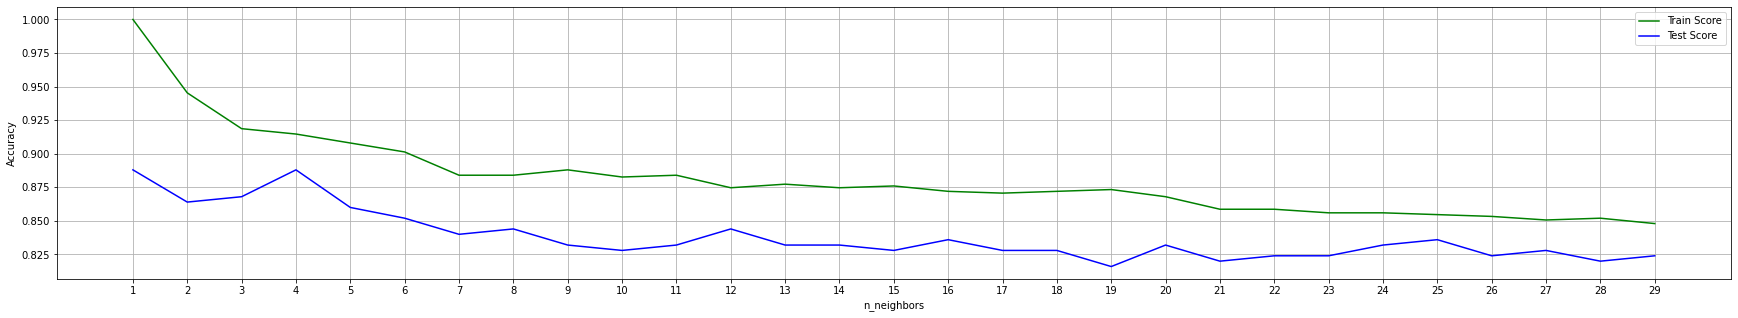

In [257]:
x_axis = range(1,30)
%matplotlib inline

plt.subplots(figsize = (30,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(29)+1)
plt.grid()
plt.legend()

At 9 nearest neighbors, the gap between the precision score of training and test scores is minimalized while also maximizing the test precision scores. The graph above looks at the accuracy of the model. Because of the tradeoffs of optimizing based on the precision score, accuracy does drop but the percentage of accuracte predictions for dissatisfied customers is maximized.

We now look at the recall and precision scores after training the model with the best hyperparameters to see how the model performs with these metrics.

In [488]:
knn = KNeighborsClassifier(9)
knn_fit = knn.fit(X_train, y_train)
knn_pred = knn_fit.predict(X_test)

In [489]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train[:,[5,7]]
y_b = y_train[:]
y_b = y_b.to_numpy()

knn_b = knn.fit(X_b, y_b)

fig = plt.figure(figsize=(10, 10))
plt.xlim(0, 1)
plt.ylim(0,0.8)

plot_decision_regions(X_b, y_b, clf = knn_b, zoom_factor = 5)
plt.xlabel('Online Boarding')
plt.ylabel('Inflight Wifi')

ModuleNotFoundError: No module named 'mlxtend'

In [269]:
confusion_matrix(y_test, knn_pred)

array([[ 90,  33],
       [  9, 118]])

In [270]:
print("Recall score logistic regression: {}".format(recall_score(y_test, knn_pred)))
print("Precision score logistic regression: {}".format(precision_score(y_test, knn_pred)))

Recall score logistic regression: 0.9291338582677166
Precision score logistic regression: 0.7814569536423841


Recall and Precision score are not bad. Recall score shows that model correctly predicts 93% of true positives. Precision score reveals the model accuractly predicted 78% of the positive observations (neutral or dissatisfied). We want to maximize accurately predicting the positive observations when the customer is neutral or dissatisfied in order to better cater and service those individuals so that the airline can maximize customer satisfaction.

We then changed our scoring function to precision to optimize the precision of the models.

In [274]:
k_range = list(range(1,30))
param_grid = dict(n_neighbors=k_range)

gs_knn = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, scoring='precision', n_jobs=-1)

# Fit data with model and print best score and parameters
gs_knn.fit(X_train, y_train)
print("Best score: {}".format(gs_knn.best_score_))
print("Best parameters: {}".format(gs_knn.best_params_))

Best score: 0.8679105354223218
Best parameters: {'n_neighbors': 2}


Our Grid Search reveals that 2 nearest neighbors optimizes the precision score of 87%.

We now train our model based on this factor and look at the decision score.

In [279]:
knn2 = KNeighborsClassifier(2)
knn2_fit = knn2.fit(X_train, y_train)
knn2_pred = knn2_fit.predict(X_test)

In [280]:
confusion_matrix(y_test, knn2_pred)

array([[110,  13],
       [ 21, 106]])

In [281]:
print("Recall score logistic regression: {}".format(recall_score(y_test, knn2_pred)))
print("Precision score logistic regression: {}".format(precision_score(y_test, knn2_pred)))

Recall score logistic regression: 0.8346456692913385
Precision score logistic regression: 0.8907563025210085


Now the precision score is 89%. There is some tradeoff with the recall score, but both are pretty good. 

In [516]:
print(classification_report(y_test, knn2_pred , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.84      0.89      0.87       123
neutral/dissatisfied       0.89      0.83      0.86       127

            accuracy                           0.86       250
           macro avg       0.87      0.86      0.86       250
        weighted avg       0.87      0.86      0.86       250



### Logistic Regression

Now we move onto logistic regression. For the logistic regression model, we will use the penalty of l2 and use a scoring of precision for the grid search model. 

In [494]:
# Using GridSearchCV to find best hyperparameters - using 3 folds because dataset is large
lr = LogisticRegression(random_state=0)
solvers = ['lbfgs', 'liblinear']
penalty = ['l2']
c_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_gridlr = dict(solver=solvers, penalty=penalty, C=c_vals)

grid_searchlr = GridSearchCV(lr, param_gridlr, cv=5, scoring='precision', n_jobs=-1)

In [495]:
grid_searchlr.fit(X_train, y_train)

# Print results
print("Best score: {}".format(grid_searchlr.best_score_))
print("Best parameters: {}".format(grid_searchlr.best_params_))

Best score: 0.8635404825059998
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


We also plot the different iterations of the model to see how the accuracy of the model compares for each. 

In [497]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l2 = []
test_score_l2 = []

for c in c_range:
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear', max_iter = 1000)
    log_l2.fit(X_train, y_train)
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l2.append(log_l2.score(X_test, y_test))

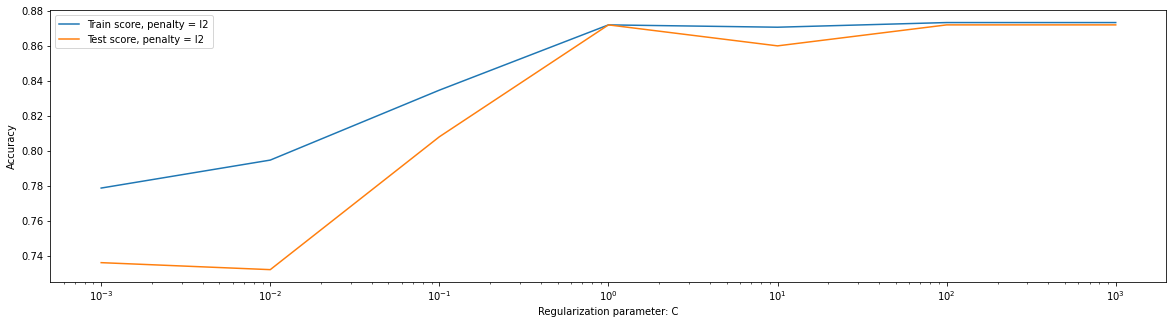

In [499]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

The best parameters are C=1, penaly=l2, and solver=liblinear. This gives the best precision score of 86%

Next, we train our model with the best hyperparameters and take a look at the confusion matrix to see how many true positives and negatives as well as false positive and negative result from the model's prediction compared to actual data in the test dataset.

In [543]:
logreg = LogisticRegression(random_state=0, C=1, penalty='l2', solver='liblinear')
logreg_fit = logreg.fit(X_train, y_train)
pred_logreg = logreg_fit.predict(X_test)

We'll look at the confusion matrix of the predictions as well as the classification reports showing the precision and recall scores.

In [365]:
from sklearn.metrics import confusion_matrix

print("\nLogisticRegression:")
print(confusion_matrix(y_test, pred_logreg))


LogisticRegression:
[[105  18]
 [ 14 113]]


In [544]:
print(classification_report(y_test, logreg.predict(X_test) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.88      0.85      0.87       123
neutral/dissatisfied       0.86      0.89      0.88       127

            accuracy                           0.87       250
           macro avg       0.87      0.87      0.87       250
        weighted avg       0.87      0.87      0.87       250



Here we can see that there are 105 out of 123 correct predictions for neutral or dissatisfied customers and 113 out of 127 correct predictions for when customers are satisfied.

In [366]:
print("Recall score logistic regression: {}".format(recall_score(y_test, pred_logreg)))
print("Precision score logistic regression: {}".format(precision_score(y_test, pred_logreg)))

Recall score logistic regression: 0.889763779527559
Precision score logistic regression: 0.8625954198473282


We look at the scores of the data before any preprocessing.

In [367]:
from sklearn.metrics import precision_score, recall_score

y_predict = np.where(grid_searchlr.decision_function(X_test) >= 0.5, 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

Before the post processing: 
Precision:  0.8947368421052632
Recall:  0.8031496062992126


Now we look at the precision recall curve and do post-processing based on the threshold values closest to 0.90.

In [400]:
# Look up optimal threshold for precision nearest to 0.90
precision, recall, thresholds = precision_recall_curve(y_train, grid_searchlr.decision_function(X_train))

In [419]:
np.argmin(np.abs(precision - 0.91))

305

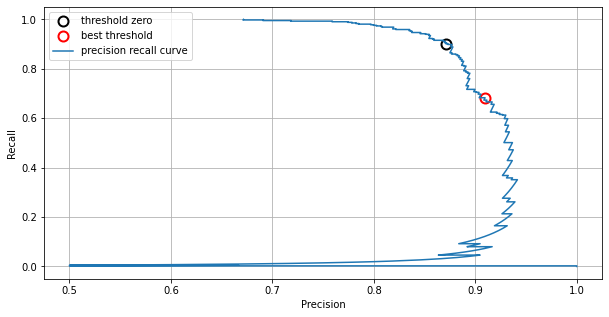

In [414]:
from sklearn.metrics import precision_recall_curve

%matplotlib inline

plt.subplots(figsize = (10,5))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
          label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision[305], recall[305], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [500]:
# Look at the new threshold
thresholds[305]

1.1304649893901244

Now we work on post-processing the data with the new threshold.

In [542]:
from sklearn.metrics import precision_score, recall_score

y_predict = np.where(grid_searchlr.decision_function(X_test) >= thresholds[305], 1, 0)
print('After the post processing: ')
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

After the post processing: 
Precision:  0.9318181818181818
Recall:  0.6456692913385826


New results for the classification reports:

In [524]:
print(classification_report(y_test, y_predict , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.72      0.95      0.82       123
neutral/dissatisfied       0.93      0.65      0.76       127

            accuracy                           0.80       250
           macro avg       0.83      0.80      0.79       250
        weighted avg       0.83      0.80      0.79       250



In [530]:
# Check overall accuracy
confusion_matrix(y_test, y_predict)

array([[117,   6],
       [ 45,  82]])

In [532]:
print('Score: ', (117 + 82) / (117 + 6 + 45 + 82))

Score:  0.796


This shows improved precision for the positive case (predicting whether a customer is likely to be neutral/dissatisfied about the airline's service). The new test score on the data is 79.6%

### SVM Linear SVC model

Next, we looked at Support Vector Machine Models. We instantiated the model and plotted the decision regions

In [335]:
clf = LinearSVC(random_state=0)

Then we ran GridSearchCV to find the best optimal parameters.

In [336]:
param_gridclf = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_searchclf = GridSearchCV(clf, param_gridclf, cv=5, n_jobs=-1)

In [337]:
# Fit model and print results
clf_results = grid_searchclf.fit(X_train, y_train)

print("Best score: {}".format(clf_results.best_score_))
print("Best parameters: {}".format(clf_results.best_params_))

Best score: 0.8600000000000001
Best parameters: {'C': 0.1}


We also look at the classification report for this model's predictions.

In [523]:
print(classification_report(y_test, clf_results.predict(X_test) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.88      0.85      0.86       123
neutral/dissatisfied       0.86      0.89      0.87       127

            accuracy                           0.87       250
           macro avg       0.87      0.87      0.87       250
        weighted avg       0.87      0.87      0.87       250



Optimal hyperparameters are 0.1 which gives a precision score of 86%. 

In [ ]:
X_b =  X_train[:,[5,7]]
y_b = y_train[:]
y_b = y_b.to_numpy()

LSVC = SVC(random_state=0, C=0.1)
LSVC.fit(X_b, y_b)

plt.subplots(figsize = (10,10))

plot_decision_regions(X_b, y_b, clf = LSVC)

### Kernelized Support Vector Machine 
* rbf
* poly
* linear

We will first instantiate a baseline svc model

In [439]:
svc = SVC(random_state=0)

#### rbf
We ran the kernelized svm model with GridSearchCV to find the best optimal parameters using cv=5 and n_jobs=-1.

In [501]:
param_gridrbf = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']}

param_gridrbf = GridSearchCV(svc, param_gridrbf, cv=5, n_jobs=-1, scoring='precision')

In [502]:
# Fit grid model and print best results
rbf_results = param_gridrbf.fit(X_train, y_train)
print("Best score: {}".format(rbf_results.best_score_))
print("Best parameters: {}".format(rbf_results.best_params_))

Best score: 0.8929956411998783
Best parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


We also look at the classification report for this model's predictions.

In [520]:
print(classification_report(y_test, rbf_results.predict(X_test) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.93      0.87      0.90       123
neutral/dissatisfied       0.88      0.94      0.91       127

            accuracy                           0.90       250
           macro avg       0.91      0.90      0.90       250
        weighted avg       0.91      0.90      0.90       250



Optimal parameters of C=10 and gamma=0.1 give a precision score of 89.30%

We will plot the decision regions for this model. 

NameError: name 'plot_decision_regions' is not defined

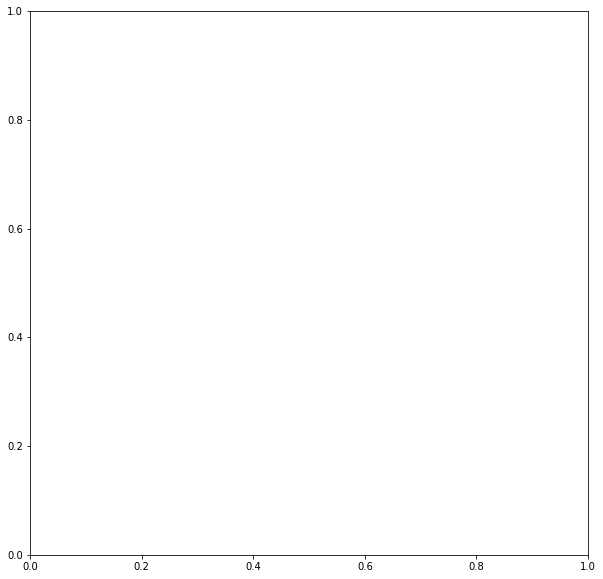

In [491]:
X_b =  X_train[:,[5,7]]
y_b = y_train[:]
y_b = y_b.to_numpy()

rbf = SVC(random_state=0, C=10, gamma=0.1, kernel='rbf')
rbf.fit(X_b, y_b)

plt.subplots(figsize = (10,10))

plot_decision_regions(X_b, y_b, clf = rbf)

#### poly
Next we ran the kernelized svm model with poly as the kernel using GridSearchCV to find the best parameters.

In [503]:
param_gridpoly = {'C': [0.1, 1, 10, 100, 1000],
                 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'kernel': ['poly']}

param_gridpoly = GridSearchCV(svc, param_gridpoly, cv=5, n_jobs=-1, scoring='precision')

In [504]:
# Fit model and print best results
poly_results = param_gridpoly.fit(X_train, y_train)
print("Best score: {}".format(poly_results.best_score_))
print("Best parameters: {}".format(poly_results.best_params_))

Best score: 0.8900149233482567
Best parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}


In [521]:
print(classification_report(y_test, poly_results.predict(X_test) , target_names = ['satisfied', 'neutral/dissatisfied']))

                      precision    recall  f1-score   support

           satisfied       0.91      0.87      0.89       123
neutral/dissatisfied       0.88      0.91      0.90       127

            accuracy                           0.89       250
           macro avg       0.89      0.89      0.89       250
        weighted avg       0.89      0.89      0.89       250



Optimal parameters of C=10 and degree=2 give a precision score of 89%

We will plot the decision regions for this model. 

NameError: name 'plot_decision_regions' is not defined

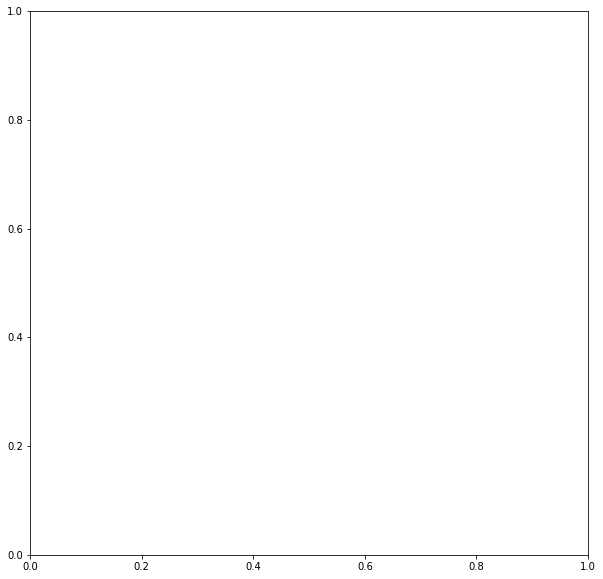

In [490]:
X_b =  X_train[:,[5,7]]
y_b = y_train[:]
y_b = y_b.to_numpy()

poly = SVC(random_state=0, C=10, degree=2, kernel='poly')
poly.fit(X_b, y_b)

plt.subplots(figsize = (10,10))

plot_decision_regions(X_b, y_b, clf = poly)

#### linear
For the final kernelized svm, we ran the svm with the linear kernel using GridSearchCV to find the best hyperparameters using cv=3 and n_jobs=-1

In [479]:
param_gridlinear = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                   'kernel': ['linear']}

grid_searchl = GridSearchCV(svc, param_gridlinear, cv=5, n_jobs=-1, scoring='precision')


In [480]:
# Fit model and print best results
l_results = grid_searchl.fit(X_train, y_train)
print("Best score: {}".format(l_results.best_score_))
print("Best parameters: {}".format(l_results.best_params_))

Best score: 0.8550065090360736
Best parameters: {'C': 0.1, 'kernel': 'linear'}


In [522]:
print(classification_report(y_test, l_results.predict(X_test) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.91      0.82      0.86       123
neutral/dissatisfied       0.84      0.92      0.88       127

            accuracy                           0.87       250
           macro avg       0.88      0.87      0.87       250
        weighted avg       0.88      0.87      0.87       250



The best parameters for the linear kernelized svm is C=0.1. Now we plot the decision region for the top two variables. 

NameError: name 'plot_decision_regions' is not defined

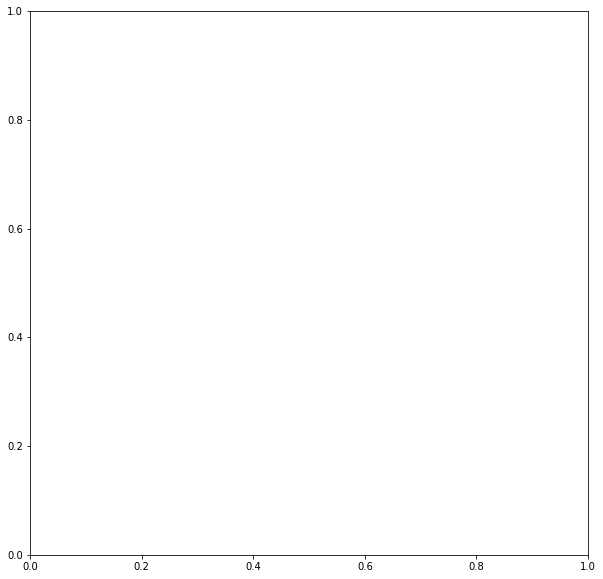

In [492]:
X_b =  X_train[:,[5,7]]
y_b = y_train[:]
y_b = y_b.to_numpy()

linear = SVC(random_state=0, C=0.1, kernel='linear')
linear.fit(X_b, y_b)

plt.subplots(figsize = (10,10))

plot_decision_regions(X_b, y_b, clf = linear)

### Decision Tree
Our last look at models is the decision tree. We use the grid search method to check for the optimal max_depth between 1-20. 

In [431]:
param_griddt = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

#gridsearch object
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_griddt, cv=5, return_train_score=True, scoring='precision')

gs_dt.fit(X_train, y_train)

print("Best parameters: {}".format(gs_dt.best_params_))
# Question 12 - What is the best score 
print("Best cross-validation score: {}".format(gs_dt.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.8738881906623842


The best model uses a max_depth of 3 for a precision score of 0.873888

Next, we visualize the results by training and predicting using the optimal max_depth of 3.

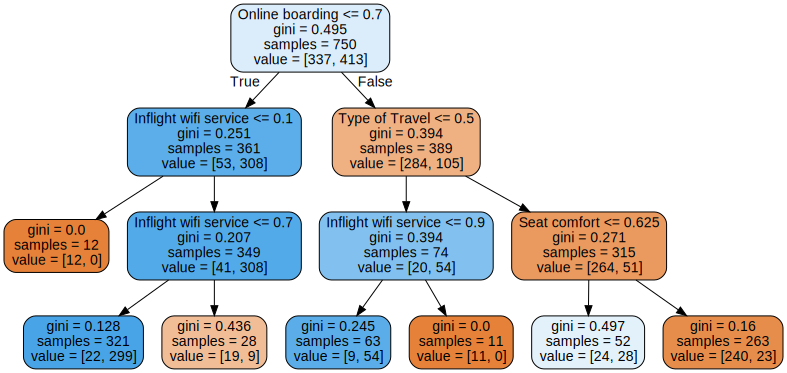

In [433]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=X.columns) 

# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

Visualizing the decision tree uses 3 layers with Online boarding, inflight wifi service, Type of Travel, and Seat comfort. 

In [443]:
tree.score(X_test, y_test)

0.864

The test score for the best decision tree is 86.4%.

We will take a look at the classification report now.

In [525]:
print(classification_report(y_test, tree.predict(X_test) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.92      0.80      0.85       123
neutral/dissatisfied       0.83      0.93      0.87       127

            accuracy                           0.86       250
           macro avg       0.87      0.86      0.86       250
        weighted avg       0.87      0.86      0.86       250



We took a look at the most important variables in the model to look at the decision regions. 

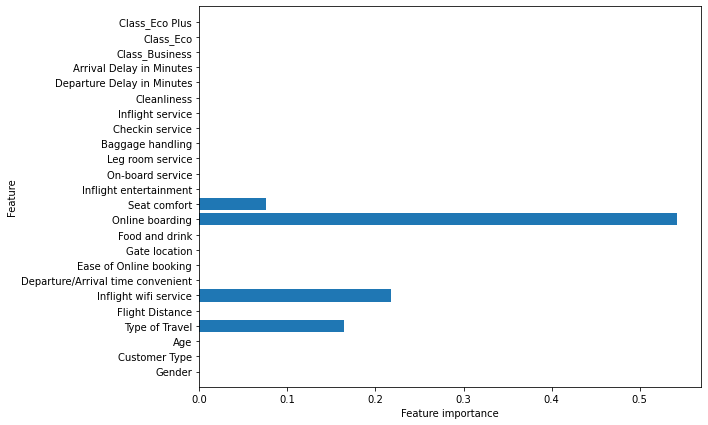

In [452]:
%matplotlib inline

def plot_feature_importances(model):
    fig, ax = plt.subplots(figsize=(9, 7))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

The most important two features were online boarding and inflight wifi service

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass criterion=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


KeyError: 3

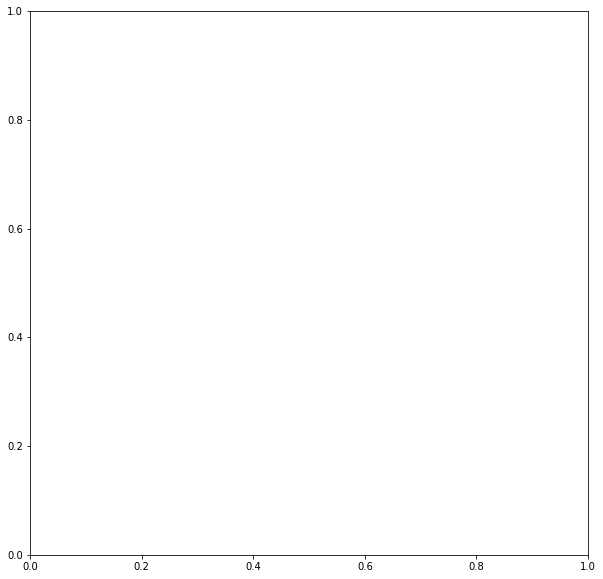

In [493]:
X_b =  X_train[:,[5,7]]
y_b = y_train[:]
y_b = y_b.to_numpy()

plt.subplots(figsize = (10,10))
dtree = DecisionTreeClassifier(3)
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = dtree)

## Final Model: KNN 2
In conclusion, the best model for this dataset that best predicted whether a customer would be dissatisfied or neutral about their experience with the airline is the K Nearest Neighbors Classification model with 2 nearest neighbors. It offered the best precision score without post-processing and keeping the recall and accuracy score high. 

In [539]:
# Train model
knn_2 = KNeighborsClassifier(2).fit(X_train, y_train)
knn_2_predict = knn_2.predict(X_test)

print("2 Nearest Neighbors Test Score: ", knn_2.score(X_test, y_test))

2 Nearest Neighbors Test Score:  0.864


In [541]:
print(classification_report(y_test, knn_2_predict, target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.84      0.89      0.87       123
neutral/dissatisfied       0.89      0.83      0.86       127

            accuracy                           0.86       250
           macro avg       0.87      0.86      0.86       250
        weighted avg       0.87      0.86      0.86       250

